# Articial Intelligence and Machine Learning
# Jupyter Notebook Contents
The various sections in the notebook include code, code comments and appropriate
Markup cells describing your approach chosen.
In detail, sections should include the following:
# Introduction and Problem Definition
- Textual description providing an overview over the data
- A discussion on why this problem is a regression problem
- A detailed problem statement question as discussed in Lecture 3.
# Data Ingestion
- Code to load the data into a suitable format to be used in the notebook
- A description of the statistical data types for each field in the file days.csv
# Data Preparation
Exploratory data analysis has taken place and the following was
concluded:
- Missing values are in the ‘temp’ and ‘atemp’ columns.
- The peak usage hours are: 7-9AM and 4-7PM on working days, and 10am-4pm on
non-working days.
- At night (10pm-4am) the bike rentals are low
- If the humidity or wind-speed is high, the number of rentals decreases.
# Data preparation steps therefore include the following:
- Fill the missing values in the temperature columns automatically with values that
would most closely mirror the actual temperature.
- Create a new field that indicates whether it is a peak time or not
- Create a new field that indicates whether it is night time or not
- Remove all fields containing information about specific dates (‘yr’, ‘mnth’, ‘dteday’),
‘casual’ and ‘registered’ and any other variables that you deem irrelevant.

- Utilisation of manual or automatic hyperparameter optimization and justification of
your choices to create “optimized” versions of each regression model
Model Evaluation
- Selection of appropriate regression metrics and a written outline why they are
suitable for this data
- A comparison of the baseline models to the “optimized” versions and an evaluation
of the results
Conclusion
- A conclusion and interpretation of the results and suggestion of potential
improvements

# A- Introduction and Problem Definition

**1- Overview of Data**

A new version of traditional bike rentals, bike sharing systems automate the whole process from registration to rental to return. These technologies make it simple for users to hire bikes from one location and drop them off at a different one. There are already around 500 bike-sharing schemes and over 500 thousand bicycles available worldwide. These systems are of tremendous interest nowadays because of their crucial role in transportation, environmental, and health concerns.

Bike sharing systems are appealing for study due to their data generation qualities, in addition to their intriguing real-world applications. In contrast to other modes of transportation like the bus or the subway, these systems openly record the distance travelled as well as the location of departure and arrival. This feature transforms the bike sharing programmed into a fictitious sensor network that can track urban motion. As a result, it is anticipated that monitoring this data will allow for the detection of the majority of significant occurrences in the city.



| Name of Attribute | Description
| --- | --- 
| instant | It provide the record index
| dteday  | Date on which attributes were recorded
| season  | Weatehr Season, 1 = Spring
| mnth  | Date on which attributes were recorded
| yr | Year in which information was recorded
| hr  | Date on which attributes were recorded
| holiday | Either it was holiday or not
| weekday  | Number of Week days: 1 = Monday, 2=Tuesday and so on
| workingday | Either it was a holiday or not
| weatherisit  | 1: Clear, Few clouds, Partly cloudy, Partly cloudy
| temp | Normalized temperature in Celsius.
| atemp  |  Normalized feeling temperature in Celsius
| hum | value of humidity
| windspeed  | weather information: wind speed
| cnt | Total number of bikes rented
| registered  |  total number of registered user on that day

**2- why it is a regression problem**

When we talk about machine learning problems, we have regression, classification, clustering and few more types of problems. In clustering and classification, we need the grouping of data. Meanwhile, if we are looking at any dataset and we need to predict something, then such problems are classified as the regression problems.

In this case, we have a rental bike dataset, in which a certain numbers of bikes have been rented on a specific day. Here we can predict the output values of the dataset in a numeric value. Thats why its a regression problem and we can apply linear regression, random forest, decision tree and other types of regression algorithms to predict the certain output. This makes it a regression problem.

**3- Problem Statement**

The bike sharing system has collected the hourly bikes being rented in the city. With the emerging traffic mobility in the city, it is anticipated by authorities that monitoring this data will allow for the detection of the majority of significant vehical i.e., bikes occurrences in the city. In this regard it is, these insights are of a great significanse. It is required to obtain the insights form this dataset and apply appropriate AI based approaches, which can benifit the authorities for establishing accurate decision making process.

# B-Data Ingestion 

**1- Importing Libraries**

First of all, all the libraries which are being used in this code are given in the next cell

In [23]:
import pandas as pd      #using pandas for data analysis and machine learning tasks
import numpy as np
import matplotlib.pyplot as plt #matplotlib for the data visualization
from sklearn.model_selection import train_test_split  #scikit-learn, a machine learning library, this module is used for data splitting
from sklearn.ensemble import RandomForestRegressor  #Random Forest Model 
from sklearn.linear_model import LinearRegression   #Linear Regression Model
from sklearn.metrics import mean_absolute_error     #Sklearn Metrics for Model Evaluation
from sklearn.metrics import mean_squared_error      #Sklearn Metrics for Model Evaluation
from sklearn.metrics import mean_absolute_percentage_error     #Sklearn Metrics for Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score       #Sklearn Metrics for Model Evaluation

**2- Loading Dataset**

Importing dataset from my local machine and saveing in dataframe, next line shows the complete dataset

In [2]:
df = pd.read_csv("bike-dataset-hour.csv")
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,No,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,No,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,No,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,No,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,No,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,Yes,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,Yes,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,Yes,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,Yes,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
#df.head() is used to observe the upper rows of the dataset if we write df.head(10), then it will show first 10 rows
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,No,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,No,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,No,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,No,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,No,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,No,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,No,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,No,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,No,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,No,1,0.32,0.3485,0.76,0.0000,8,6,14


To observe the bottom lines of the dataset we use df.tail(), if df.tail(10) is used, it will show the bottom 10 rows of dataset

In [4]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,Yes,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,Yes,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,Yes,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,Yes,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,Yes,1,0.26,0.2727,0.65,0.1343,12,37,49


**3- Data Insights**

In this we will check the shape of the dataset, (rows,columns)

In [5]:
df.shape #it outpult will show that it has 17379 rows and 17 columns

(17379, 17)

decribe() is used to calclulate the count,mean,std,minimum value, maximum value and the percentile of of each column.

In [6]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,15595.000000,15595.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,1.425283,0.496451,0.475300,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.639357,0.192580,0.171928,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


info() provides the information about datatypes in each cell.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  object 
 9   weathersit  17379 non-null  int64  
 10  temp        15595 non-null  float64
 11  atemp       15595 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(2)
memory usage: 2.3+ MB


In any dataset, it is very important to check either there is any missing value or not. For this purpose isnull() command in pandas is used, here I have taken the summ of all the values and output relflext that in temp and atemp columns we have 1784 missing or null values. In next steps, we will replace these missing values.

In [8]:
df.isnull().sum()

instant          0
dteday           0
season           0
yr               0
mnth             0
hr               0
holiday          0
weekday          0
workingday       0
weathersit       0
temp          1784
atemp         1784
hum              0
windspeed        0
casual           0
registered       0
cnt              0
dtype: int64

# C- Data Preparation

In previous cell, I have identified the missing values in temp and atemp, now to fill the missing values with most appropriate points, interpolate() function is used. 

**Interpolation for Filling Missing Values**

To estimate unknown data points between two known data points in Python, we can utilise the interpolation approach. When preparing data, interpolation is typically used to fill in missing values in the dataframe or series.



In [9]:
df=df.interpolate()

In [10]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In above cell, it can be observed that all the missing values have been replace with the updated values using interpolate() function

Now as per instruction, Remove all fields containing information about specific dates (‘yr’, ‘mnth’, ‘dteday’),
‘casual’ and ‘registered’ and any other variables that you deem irrelevant.

In [11]:
df=df.drop(columns=['dteday','yr','mnth','casual','registered'])

In [12]:
df

,instant,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,6,No,1,0.24,0.2879,0.81,0.0000,16
1,2,1,1,0,6,No,1,0.22,0.2727,0.80,0.0000,40
2,3,1,2,0,6,No,1,0.22,0.2727,0.80,0.0000,32
3,4,1,3,0,6,No,1,0.24,0.2879,0.75,0.0000,13
4,5,1,4,0,6,No,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,19,0,1,Yes,2,0.26,0.2576,0.60,0.1642,119
17375,17376,1,20,0,1,Yes,2,0.26,0.2576,0.60,0.1642,89
17376,17377,1,21,0,1,Yes,1,0.26,0.2576,0.60,0.1642,90
17377,17378,1,22,0,1,Yes,1,0.26,0.2727,0.56,0.1343,61


As highlited in the instructions, we have hours information from 0-23 in the dataset. In the next cell, I have made a new column to show the day and night with respect to that certain hours. Here, I have selected the 6 A.M to 6 P.M as day and rest has been taken as Night.

In [13]:
df['session'] = pd.cut(df['hr'], bins=[8,16,24], labels=['Night', 'Day'], include_lowest=True)

In [14]:
def f(x):
    if (x > 6) and (x <= 18):
        return 'Day'
    else:
        return'Night'

In [15]:
df['session'] = df['hr'].apply(f)
df.head(10)

,instant,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,session
0,1,1,0,0,6,No,1,0.24,0.2879,0.81,0.0000,16,Night
1,2,1,1,0,6,No,1,0.22,0.2727,0.80,0.0000,40,Night
2,3,1,2,0,6,No,1,0.22,0.2727,0.80,0.0000,32,Night
3,4,1,3,0,6,No,1,0.24,0.2879,0.75,0.0000,13,Night
4,5,1,4,0,6,No,1,0.24,0.2879,0.75,0.0000,1,Night
5,6,1,5,0,6,No,2,0.24,0.2576,0.75,0.0896,1,Night
6,7,1,6,0,6,No,1,0.22,0.2727,0.80,0.0000,2,Night
7,8,1,7,0,6,No,1,0.20,0.2576,0.86,0.0000,3,Day
8,9,1,8,0,6,No,1,0.24,0.2879,0.75,0.0000,8,Day
9,10,1,9,0,6,No,1,0.32,0.3485,0.76,0.0000,14,Day


**1- Why to use data Binning**

The purpose of data binning, also known as discrete binning or bucketing, is to lessen the impact of small observational mistakes. This kind of quantization is used. The initial data values are split up into discrete intervals, or bins, and are subsequently swapped out with a generic value computed for that bin. This has a calming impact on the input data and, in the case of tiny datasets, may also lessen the likelihood of over fitting.

When we apply binning to a continuous variable, some data is automatically lost. In order to create a forecast, many algorithms would like a continuous input, and many of them would also bin the continuous input themselves. If our continuous variable is noisy, which means that the values for your variable were not recorded with great accuracy, binning would be a good decision to make. Binding might then lessen this loudness. Equal width binning and equal frequency binning are two examples of binning techniques. If your continuous variable has an asymmetric distribution, I would advise against using equal width binnin.

**2- Data Encoding**

Categorical variables will be included in the data set for many practical data science exercises. These variables, which reflect diverse qualities, are often saved as text values. Color ("Red," "Yellow," "Blue"), size ("Small," "Medium," "Large"), and regional identifiers are a few examples (State or Country). The difficulty is figuring out how to use this data in the analysis, regardless of what purpose the value is used for. Without further modification, many machine learning algorithms can accommodate categorical values, but there are many more algorithms that cannot. As a result, the analyst must overcome the difficulty of converting these language qualities into numerical values for additional processing.

In [16]:
#importing the libraries 
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
encoded = le.fit_transform(df['workingday'])
encoded_session = le.fit_transform(df['session'])

In [18]:
df.drop("workingday", axis=1, inplace=True)
df.drop("session", axis=1, inplace=True)

# Appending the array to our dataFrame
df["workingday"] = encoded
df["session"] = encoded_session

# printing Dataframe
df

,instant,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,workingday,session
0,1,1,0,0,6,1,0.24,0.2879,0.81,0.0000,16,0,1
1,2,1,1,0,6,1,0.22,0.2727,0.80,0.0000,40,0,1
2,3,1,2,0,6,1,0.22,0.2727,0.80,0.0000,32,0,1
3,4,1,3,0,6,1,0.24,0.2879,0.75,0.0000,13,0,1
4,5,1,4,0,6,1,0.24,0.2879,0.75,0.0000,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,19,0,1,2,0.26,0.2576,0.60,0.1642,119,1,1
17375,17376,1,20,0,1,2,0.26,0.2576,0.60,0.1642,89,1,1
17376,17377,1,21,0,1,1,0.26,0.2576,0.60,0.1642,90,1,1
17377,17378,1,22,0,1,1,0.26,0.2727,0.56,0.1343,61,1,1


# D- Data Segregation

In the next steps, a machine learning based regression model will be applied on this problem to evaluate it. For this purposes, it is required to split dataset into training and testing. In this problem I have selected 75% dataset for the training purposes and 25% for the testing. Total we have 17379 samples in our dataset, when we split it as per our need, we will have 13034 samples for training and rest for testing of the models.

In [24]:
X = np.array(df['hr']).reshape(-1, 1)
y = np.array(df['cnt']).reshape(-1, 1)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [26]:
X_train.shape

(13034, 1)

In [27]:
X_test.shape

(4345, 1)

In [28]:
y_train.shape


(13034, 1)

In [29]:
y_test.shape

(4345, 1)

# E- Model Training

Selection and Application of regression models on data

**1-Regression Model- Random Forest**

Bagged decision tree models called random forests divide on a subset of characteristics at each split. To simplify this enormously long sentence, let's start by looking at a single decision tree, then talk about bagged decision trees, and lastly add splitting on a random subset of characteristics.

Benifits:

1. A random forest generates accurate forecasts that are simple to comprehend.

2. Effectively handles large datasets.

3. In comparison to the decision tree method, the random forest algorithm offers a better level of accuracy in result prediction.

In [30]:
# fit the model
model = RandomForestRegressor() #building model as it has been imported from sklearn in Cell # 1
model.fit(X_train, y_train) #Performing fiting on the model

C:\Users\Taimoor M Gondal\AppData\Local\Temp\ipykernel_12124\3829288696.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) #Performing fiting on the model


RandomForestRegressor()

**Mean Absolute Error**

The average discrepancy between the estimated and real values is computed using mean absolute error. As it calculates inaccuracy in observations made on the same scale, it is also known as scale-dependent accuracy. It serves as a machine learning assessment metric for regression models. It estimates the discrepancies between the model's predicted values and the actual values. It is employed to forecast the machine learning model's accuracy.

In [33]:
# make predictions
yhat = model.predict(X_test)
# evaluate predictions
mae_random = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae_random)

MAE: 89.591


**Mean Absolute Percentage Error**

It evaluates how accurate a company's forecasting process was. It shows, on average, how accurate the anticipated quantities were in relation to the actual amounts by averaging the absolute percentage errors of each entry in a dataset.

In [34]:
mape_random = mean_absolute_percentage_error(y_test, yhat)
print('MAPE: %.3f' % mape_random)

MAPE: 1.360


**Root Mean Square Error**

Root mean square error or root mean square deviation is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values using Euclidean distance.

In [35]:
mse_random = mean_squared_error(y_test, yhat)
print('MSE: %.3f' % mse_random)

MSE: 16710.352


In [36]:
rmse_random = mean_squared_error(y_test, yhat,squared=False)
print('RMSE: %.3f' % rmse_random)

RMSE: 129.269


**Optimized Model**

In [37]:
model_1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
model_1.fit(X_train, y_train) #Performing fiting on the model

C:\Users\Taimoor M Gondal\AppData\Local\Temp\ipykernel_12124\3813910747.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(X_train, y_train) #Performing fiting on the model
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', min_samples_split=4, n_estimators=200)

In [38]:
yhat_1 = model_1.predict(X_test)
mape_random_1 = mean_absolute_percentage_error(y_test, yhat_1)
print('MAPE of optimized Model: %.3f' % mape_random_1)
mse_random_1 = mean_squared_error(y_test, yhat_1)
print('MSE optimized Model: %.3f' % mse_random_1)
rmse_random_1 = mean_squared_error(y_test, yhat_1,squared=False)
print('RMSE optimized Model: %.3f' % rmse_random_1)

MAPE of optimized Model: 1.359
MSE optimized Model: 16710.194
RMSE optimized Model: 129.268


**2- Regression Model-Linear Regression**

A variable's value can be predicted using linear regression analysis based on the value of another variable. The dependent variable is the one you want to be able to forecast. The independent variable is the one you're using to make a prediction about the value of the other variable.

In [39]:
regr = LinearRegression()  #Building the very basic linear regression model


In [40]:
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.14983940882958713


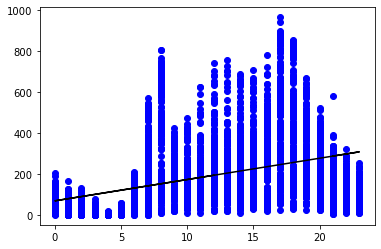

In [41]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [42]:

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
mape= mean_absolute_percentage_error(y_true=y_test,y_pred=y_pred)
print("MAPE:",mape)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAPE: 4.57221948730923
MAE: 125.53429365914221
MSE: 27997.25826928659
RMSE: 167.32381261878595


# F- Model Evaluation

**1- Evaluation of Random Forest with basic parameters**

In [43]:
print("MAE for random forest:",mae_random)
print("MSE random forest:",mse_random)
print("MAPE random forest:",mape_random)
print("RMSE random forest:",rmse_random)

MAE for random forest: 89.59052548657105
MSE random forest: 16710.352106630737
MAPE random forest: 1.3596849901601344
RMSE random forest: 129.26852713104896


**2- Evaluation of Random Forest with optimized Parameters**



In [44]:
print('MAPE of optimized Model: %.3f' % mape_random_1)
print('MSE optimized Model: %.3f' % mse_random_1)
print('RMSE optimized Model: %.3f' % rmse_random_1)

MAPE of optimized Model: 1.359
MSE optimized Model: 16710.194
RMSE optimized Model: 129.268


**3- Evaluation of Linear Regression**

In [45]:
print("MAE for Linear Regression:",mae)
print("MSE Linear Regression:",mse)
print("RMSE Linear Regression:",rmse)
print("MAPE Linear Regression:",mape)

MAE for Linear Regression: 125.53429365914221
MSE Linear Regression: 27997.25826928659
RMSE Linear Regression: 167.32381261878595
MAPE Linear Regression: 4.57221948730923


# G- Conclusion and Comparison

In this task, I have implemented Linear Regression and Random Forest for the described problem (Section-A) using the bike dataset as provided by the instructor. While performing data preprocessing it was identified that the their are missing values present in the dataset and those were replace by using the interpolation approach. After successfull data preprocessing, two regression models with optmized parameters were deployed on the dataset. Dataset was splitted into 75-25 ratio. In which 75% of the dataset was used for the training while the rest was opted for the testing purpose.
Through the results obtained from the Evaluation of the models reflects the MAE, RMSE and MAPE. These parameters can be used to depict the model performance on the datset. Following is the analysis

1. MAE Value of Random Forest is lower than Linear Regression
2. MAPE Value of Random Forest is lower than Linear Regression
3. RMSE Value of Random Fores is lower than Linear Regression

From the above obtained results from the model it can be estimated that Random Forest Model outperformed the Linear Regression Model for the case considered in this task. 
On the other hand, We have Optimized Case for the Random Forest Model, from the evaluation of the model it can be estimated that there is slight difference in the optimized model to he base model. Also, it optimized model of random forest outperforms the linear regression model. 

**Random Forest is better than Linear Regression, but it has many parameters, it will always be faced by overfitting problems**

# H- References



Sources:

- Implementation of Linear Regression : https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
- Implementation of Random Forest     : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Overview about the bike dataset and Description   : https://github.com/pgebert/bike-sharing-dataset/blob/master/README.md
- Overview of Evaluation Parameters   :https://towardsdatascience.com/choosing-the-correct-error-metric-mape-vs-smape-5328dec53fac
-Best sources to fill null values: https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/
